<a href="https://colab.research.google.com/github/hymavathi/topicAnlysisNLP/blob/main/Topic_Analysis_of_Review_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the tweets file using read_csv function from Pandas package

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
review_data = pd.read_csv('K8 Reviews v0.2.csv').drop('sentiment',axis=1)
review_data.head()

,review
0,Good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr..."
2,when I will get my 10% cash back.... its alrea...
3,Good
4,The worst phone everThey have changed the last...


In [ ]:
#Shape of the data frame
review_data.shape

(14675, 1)

### Data Pre-Processing

## Replacing/Dropping NULL values


In [ ]:
review_data.isnull().sum()

review    0
dtype: int64

No Nulls so we are good

## Converting to LOWER case

In [ ]:
review_data['clean_review'] = review_data['review'].apply(lambda x: str(x).lower())
review_data.head()

,review,clean_review
0,Good but need updates and improvements,good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr...","worst mobile i have bought ever, battery is dr..."
2,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...
3,Good,good
4,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


In [ ]:
review_data.head()


,review,clean_review
0,Good but need updates and improvements,good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr...","worst mobile i have bought ever, battery is dr..."
2,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...
3,Good,good
4,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


## REMOVE NON-ALPHA DATA(DIGITS,PUNCTUATIONS,DIACRITICS)

In [ ]:
review_data['clean_review'] = review_data['clean_review'].str.replace(r'[^a-zA-Z\s]', ' ',regex=True)
review_data.head()

,review,clean_review
0,Good but need updates and improvements,good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr...",worst mobile i have bought ever battery is dr...
2,when I will get my 10% cash back.... its alrea...,when i will get my cash back its alrea...
3,Good,good
4,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


# REMOVING WHITE SPACE

In [ ]:
review_data['clean_review'] = review_data['clean_review'].str.replace(r'\s{2,}', ' ',regex=True)
review_data.head()

,review,clean_review
0,Good but need updates and improvements,good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr...",worst mobile i have bought ever battery is dra...
2,when I will get my 10% cash back.... its alrea...,when i will get my cash back its already january
3,Good,good
4,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


# 5. WORD TOKENIZATION

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
review_data['clean_review'] = review_data['clean_review'].apply(lambda x: word_tokenize(x))
review_data.head()

,review,clean_review
0,Good but need updates and improvements,"[good, but, need, updates, and, improvements]"
1,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, i, have, bought, ever, battery..."
2,when I will get my 10% cash back.... its alrea...,"[when, i, will, get, my, cash, back, its, alre..."
3,Good,[good]
4,The worst phone everThey have changed the last...,"[the, worst, phone, everthey, have, changed, t..."


# 6. REMOVE UNNECESSARY WORDS

In [ ]:
!pip install stopwords

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x:[word for word in x if word not in stopwords.words("english") and len(word) > 3 and word.isalpha()])
review_data.head()

,review,clean_review
0,Good but need updates and improvements,"[good, need, updates, improvements]"
1,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, bought, ever, battery, drainin..."
2,when I will get my 10% cash back.... its alrea...,"[cash, back, already, january]"
3,Good,[good]
4,The worst phone everThey have changed the last...,"[worst, phone, everthey, changed, last, phone,..."


# 7. LEMMATIZATION

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])
review_data.head()

,review,clean_review
0,Good but need updates and improvements,"[good, need, update, improvement]"
1,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, bought, ever, battery, drainin..."
2,when I will get my 10% cash back.... its alrea...,"[cash, back, already, january]"
3,Good,[good]
4,The worst phone everThey have changed the last...,"[worst, phone, everthey, changed, last, phone,..."


# Extracting only NOUN

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x: [word for word in x if nltk.pos_tag([word])[0][1] == 'NN'])

In [ ]:
review_data = review_data[review_data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words

In [ ]:
review_data.head()

,review,clean_review
0,Good but need updates and improvements,"[need, update, improvement]"
1,"Worst mobile i have bought ever, Battery is dr...","[mobile, bought, battery, hell, backup, hour, ..."
2,when I will get my 10% cash back.... its alrea...,"[cash, january]"
3,The worst phone everThey have changed the last...,"[phone, everthey, phone, problem, amazon, phon..."
4,Only I'm telling don't buyI'm totally disappoi...,"[buyi, disappointedpoor, batterypoor, camerawa..."


#  Document Term Matrix

In [ ]:
import gensim
from gensim import corpora

In [ ]:
dictionary = corpora.Dictionary(review_data['clean_review'])
print(dictionary)

# We have 6724 unique tokens

Dictionary<6724 unique tokens: ['improvement', 'need', 'update', 'amazon', 'backup']...>


In [ ]:
doc_term_matrix = review_data['clean_review'].apply(lambda x: dictionary.doc2bow(x))
doc_term_matrix[:10]

# Each tokenized words has been assigned index value and thier count in corpus

0                             [(0, 1), (1, 1), (2, 1)]
1    [(3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1...
2                                   [(19, 1), (20, 1)]
3                  [(3, 2), (21, 1), (22, 3), (23, 1)]
4        [(24, 1), (25, 1), (26, 1), (27, 1), (28, 1)]
5    [(14, 1), (22, 1), (29, 1), (30, 1), (31, 1), ...
6                           [(5, 1), (36, 1), (37, 1)]
7    [(14, 2), (22, 2), (23, 2), (34, 1), (38, 1), ...
8                 [(44, 1), (45, 1), (46, 1), (47, 1)]
9                  [(8, 1), (22, 1), (48, 1), (49, 1)]
Name: clean_review, dtype: object

# LDA

In [ ]:
from IPython.display import clear_output

In [ ]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(corpus=doc_term_matrix, num_topics=12, id2word=dictionary, passes=10,random_state=45)
clear_output()

# corpus requires document term matrix
# num_topics is used to define number of topics to create from corpus
# id2word requires mapping of words
# passes is used to define number of iterations

In [ ]:
ldamodel.print_topics()

# We have printed all 12 topics and their keywords generated by LDA

[(0,
  '0.208*"camera" + 0.104*"quality" + 0.041*"phone" + 0.033*"sound" + 0.028*"front" + 0.023*"battery" + 0.022*"mode" + 0.020*"depth" + 0.019*"display" + 0.018*"rear"'),
 (1,
  '0.117*"feature" + 0.065*"phone" + 0.057*"android" + 0.032*"stock" + 0.032*"card" + 0.028*"memory" + 0.028*"contact" + 0.023*"user" + 0.022*"slot" + 0.016*"option"'),
 (2,
  '0.341*"mobile" + 0.184*"problem" + 0.094*"heating" + 0.023*"heat" + 0.017*"network" + 0.014*"battery" + 0.011*"hang" + 0.009*"month" + 0.007*"connection" + 0.006*"player"'),
 (3,
  '0.061*"screen" + 0.061*"charger" + 0.058*"phone" + 0.050*"turbo" + 0.029*"glass" + 0.020*"processor" + 0.018*"gorilla" + 0.017*"core" + 0.016*"month" + 0.016*"time"'),
 (4,
  '0.156*"update" + 0.079*"software" + 0.042*"system" + 0.036*"phone" + 0.034*"oreo" + 0.024*"need" + 0.016*"problem" + 0.016*"bill" + 0.015*"hardware" + 0.015*"lenovo"'),
 (5,
  '0.192*"phone" + 0.102*"battery" + 0.062*"price" + 0.058*"performance" + 0.057*"camera" + 0.052*"awesome" + 0.

# Visualizing LDA model topics

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel,texts=review_data['clean_review'],\
                                     dictionary=dictionary , coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())

# Compute Coherence Score


Coherence Score:  0.5563624387311809


In [ ]:
# Computing coherence score for different size of topic

def calculate_topic_cv(ldamodel,texts,dictionary,topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=i, id2word=dictionary, passes=10,random_state=45)
    cv_score.append(CoherenceModel(model=ldamodel,texts=texts,\
                                   dictionary=dictionary , coherence='c_v').get_coherence())
    clear_output()
  return topic_num,cv_score

In [ ]:
topic_num,cv_score = calculate_topic_cv(ldamodel,review_data['clean_review'],dictionary,15)

In [ ]:
pd.DataFrame(zip(topic_num,cv_score),columns=['Topic','Coherence_Score']).set_index\
('Topic').sort_values('Coherence_Score',ascending=False)

,Coherence_Score
Topic,
8,0.614495
9,0.611938
2,0.611865
3,0.611460
7,0.606568
4,0.606537
6,0.598415
11,0.582003
10,0.579540


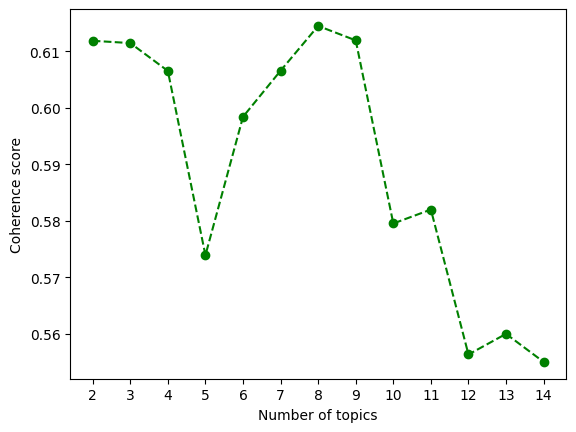

In [ ]:
import matplotlib.pyplot as plt

plt.plot(topic_num,cv_score,color='green', marker='o', linestyle='dashed')
plt.xticks(range(2,15))
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.show()

we will be going with number of topic 6 as with 8 topics there will be many overlaps .

###  Get the tweets into a list for easy text cleanup and manipulation

In [ ]:
# Creating LDA model with number of topics as 12

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=6, id2word=dictionary, passes=10,random_state=45)
clear_output()
print(CoherenceModel(model=ldamodel,texts=review_data['clean_review'],\
                     dictionary=dictionary , coherence='c_v').get_coherence())

0.5984151629204398


In [ ]:
ldamodel.print_topics()

[(0,
  '0.157*"camera" + 0.078*"quality" + 0.039*"phone" + 0.022*"sound" + 0.021*"front" + 0.019*"mode" + 0.015*"depth" + 0.014*"display" + 0.014*"performance" + 0.014*"rear"'),
 (1,
  '0.081*"note" + 0.071*"lenovo" + 0.041*"phone" + 0.025*"call" + 0.024*"feature" + 0.019*"android" + 0.015*"product" + 0.012*"speaker" + 0.012*"option" + 0.010*"stock"'),
 (2,
  '0.168*"mobile" + 0.090*"problem" + 0.049*"heating" + 0.037*"amazon" + 0.035*"product" + 0.030*"issue" + 0.022*"return" + 0.013*"time" + 0.013*"want" + 0.012*"network"'),
 (3,
  '0.071*"phone" + 0.035*"money" + 0.034*"screen" + 0.025*"charger" + 0.023*"product" + 0.021*"turbo" + 0.019*"lenovo" + 0.019*"waste" + 0.014*"amazon" + 0.013*"value"'),
 (4,
  '0.085*"phone" + 0.045*"issue" + 0.039*"update" + 0.032*"service" + 0.027*"lenovo" + 0.027*"network" + 0.027*"problem" + 0.020*"software" + 0.014*"signal" + 0.012*"call"'),
 (5,
  '0.133*"battery" + 0.128*"phone" + 0.034*"price" + 0.030*"awesome" + 0.030*"fast" + 0.029*"camera" + 0.0

In [ ]:
topic_lookup_data = pd.DataFrame((ldamodel.print_topics()),columns=['Topic_Number','Top_Keywords'])
# topic_lookup_data['Topic_Name'] = ['Camera, Sound','Mixed issues','Heating issue','turbo charger','Connectivity','Battery']
# topic_lookup_data = topic_lookup_data[['Topic_Number','Topic_Name','Top_Keywords']]
# topic_lookup_data['Top_Keywords'] = topic_lookup_data.Top_Keywords.str\
# .replace(r'[^a-z]',' ',regex=True).apply(lambda x: x.split())
# topic_lookup_data.style.set_properties(subset=['Top_Keywords'], **{'width': '300px'})

In [ ]:
topic_lookup_data

,Topic_Number,Top_Keywords
0,0,"0.157*""camera"" + 0.078*""quality"" + 0.039*""phon..."
1,1,"0.081*""note"" + 0.071*""lenovo"" + 0.041*""phone"" ..."
2,2,"0.168*""mobile"" + 0.090*""problem"" + 0.049*""heat..."
3,3,"0.071*""phone"" + 0.035*""money"" + 0.034*""screen""..."
4,4,"0.085*""phone"" + 0.045*""issue"" + 0.039*""update""..."
5,5,"0.133*""battery"" + 0.128*""phone"" + 0.034*""price..."


In [ ]:
topic_lookup_data['Topic_Name'] = ['Camera, Sound','Mixed issues','Heating issue','turbo charger','Connectivity','Battery']
topic_lookup_data = topic_lookup_data[['Topic_Number','Topic_Name','Top_Keywords']]
topic_lookup_data['Top_Keywords'] = topic_lookup_data.Top_Keywords.str\
.replace(r'[^a-z]',' ',regex=True).apply(lambda x: x.split())
topic_lookup_data.style.set_properties(subset=['Top_Keywords'], **{'width': '300px'})

,Topic_Number,Topic_Name,Top_Keywords
0,0,"Camera, Sound","['camera', 'quality', 'phone', 'sound', 'front', 'mode', 'depth', 'display', 'performance', 'rear']"
1,1,Mixed issues,"['note', 'lenovo', 'phone', 'call', 'feature', 'android', 'product', 'speaker', 'option', 'stock']"
2,2,Heating issue,"['mobile', 'problem', 'heating', 'amazon', 'product', 'issue', 'return', 'time', 'want', 'network']"
3,3,turbo charger,"['phone', 'money', 'screen', 'charger', 'product', 'turbo', 'lenovo', 'waste', 'amazon', 'value']"
4,4,Connectivity,"['phone', 'issue', 'update', 'service', 'lenovo', 'network', 'problem', 'software', 'signal', 'call']"
5,5,Battery,"['battery', 'phone', 'price', 'awesome', 'fast', 'camera', 'performance', 'backup', 'product', 'heating']"


In [ ]:
for index,sent in enumerate(ldamodel[doc_term_matrix]):
  topic_num =[]
  topic_details = sorted(sent,key=lambda x: x[1], reverse=True)[:2] # Getting top 2 topics in descending order
  topic_num.append(topic_details[0][0]) # Appending top topic
  if len(topic_details) > 1:
    if topic_details[1][1] > 0.35: # Appending second topic only if it has more than 35% influence on current row
      topic_num.append(topic_details[1][0])
  review_data.loc[index,'Topic_Number'] = ','.join(str(x) for x in sorted(topic_num))

In [ ]:
for index,topic_num in enumerate(review_data.Topic_Number):
  topic_name_list=[]
  for single_topic_num in topic_num.split(','):
    single_topic_num=int(single_topic_num)
    topic_name_list.append(topic_lookup_data.loc\
                           [topic_lookup_data.Topic_Number == single_topic_num,'Topic_Name'][single_topic_num])
  # Extracting topic names from lookup table
  review_data.loc[index,'Topic_Name'] =' & '.join(topic_name_list)

In [ ]:
topic_lookup_data.head()

,Topic_Number,Topic_Name,Top_Keywords
0,0,"Camera, Sound","[camera, quality, phone, sound, front, mode, d..."
1,1,Mixed issues,"[note, lenovo, phone, call, feature, android, ..."
2,2,Heating issue,"[mobile, problem, heating, amazon, product, is..."
3,3,turbo charger,"[phone, money, screen, charger, product, turbo..."
4,4,Connectivity,"[phone, issue, update, service, lenovo, networ..."


In [ ]:
review_data.head()

,review,clean_review,Topic_Number,Topic_Name
0,Good but need updates and improvements,"[need, update, improvement]","0,4","Camera, Sound & Connectivity"
1,"Worst mobile i have bought ever, Battery is dr...","[mobile, bought, battery, hell, backup, hour, ...",3,turbo charger
2,when I will get my 10% cash back.... its alrea...,"[cash, january]",0,"Camera, Sound"
3,The worst phone everThey have changed the last...,"[phone, everthey, phone, problem, amazon, phon...","2,5",Heating issue & Battery
4,Only I'm telling don't buyI'm totally disappoi...,"[buyi, disappointedpoor, batterypoor, camerawa...",4,Connectivity


In [ ]:
import seaborn as sns

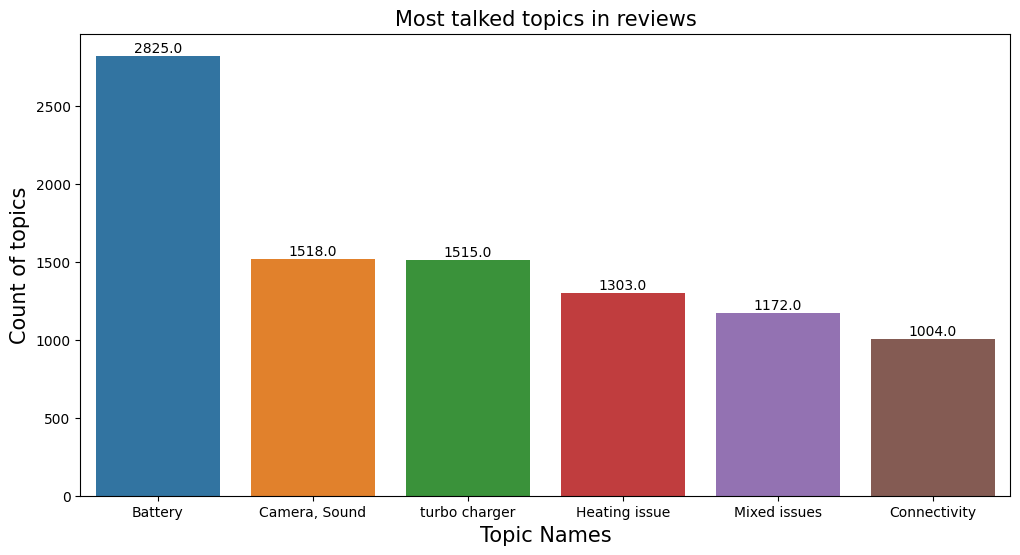

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=review_data.Topic_Name.value_counts()[:6].index,y=review_data.Topic_Name.value_counts()[:6].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+50),ha = 'center', va = 'center')
plt.xlabel('Topic Names',size=15)
plt.ylabel('Count of topics',size=15)
plt.title('Most talked topics in reviews',size=15)
plt.show()

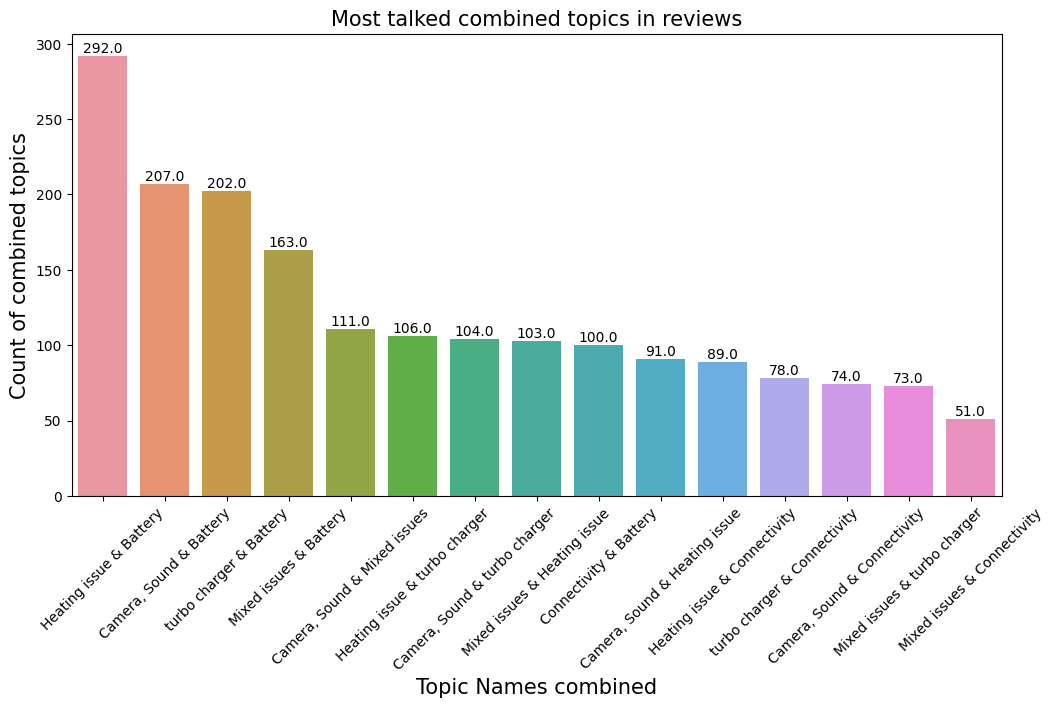

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=review_data.Topic_Name.value_counts()[6:].index,y=review_data.Topic_Name.value_counts()[6:].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+5),ha = 'center', va = 'center')
plt.xlabel('Topic Names combined',size=15)
plt.ylabel('Count of combined topics',size=15)
plt.title('Most talked combined topics in reviews',size=15)
plt.xticks(rotation=45)
plt.show()

From above graph we can say that most of customers had combined issues with,

Heating issue & Battery
Camera, Sound & Battery
turbo charger & Battery



### Text clean up
- Using Regular expressions, remove IP addresses  
- Normalize the case
- Using Regular expressions, remove URLs   
- Remove stop words  
- Remove punctuations

Extracting reviews of 5 topic(review of battery)


In [ ]:
review_data.loc[review_data.Topic_Number.str.contains('5'),['review','Topic_Name']].head(10)\
.style.set_properties(subset=['review'], **{'width': '300px'})

,review,Topic_Name
3,The worst phone everThey have changed the last phone but the problem is still same and the amazon is not returning the phone .Highly disappointing of amazon,Heating issue & Battery
5,"Phone is awesome. But while charging, it heats up allot..Really a genuine reason to hate Lenovo k8 note",Battery
10,"Don't purchase this item, It is so much of heating &Battery life is very poor",Heating issue & Battery
12,Very good phone slim good battry backup good screen love it,Battery
15,Battery draining very rapidly I don't know why..Tell me possible solutions for battery life,Heating issue & Battery
17,"Excellent camera , excellent speed.excellent features.excelent battery.",Battery
18,It is not a very good product camera are very poor ...Os is not good...Battery draining very quickly...Like a odinary phone..It was fully unexpected product from Lenovo..,Battery
21,Awesome phone in this price and this is my second mobile from lenovo. It is fast and display has been improved.,Battery
24,"Before the new update of 8.0 Oreo, it worked superbly, the battery back-up is also superb and there is not that much heating problem...But... After that update, my phone got heating up simply, battery is also draining unnecessarily... really very much disappointed after that update of 8.0 Oreo...😒😒☹️",Connectivity & Battery
26,Good performance but the battery gets oveheated,Battery


**Conclusion**

We can combine topic number 2 (Heating issue),3 (turbo charger), 5(Battery)

If lenovo company improves their turbo charger which is causing heating issues in battery, the mobile will be more appreciated by users.

We can try to use other POS tags to improve our model.